In [1]:
from __future__ import absolute_import, division,print_function, unicode_literals
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks
from matplotlib  import pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
mnist_fashion = ks.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images,test_labels)\
= mnist_fashion.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [5]:
print('Training Dataset Shape: ­{}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'.format(len(training_labels)))
print('Test Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Dataset Labels: {}'.format(len(test_labels)))

Training Dataset Shape: ­(60000, 28, 28)
No. of Training Dataset Labels: 60000
Test Dataset Shape: (10000, 28, 28)
No. of Test Dataset Labels: 10000


#### Normalize the pixel

In [6]:
training_images =  training_images / 255.0
test_images = test_images / 255.0

In [7]:
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [38]:
cnn_model = ks.models.Sequential()

In [39]:
cnn_model.add(ks.layers.Conv2D(50, (3, 3), activation=\
                              'relu', input_shape=(28, 28, 1), 
                              name = 'Conv2D_layer'))

In [40]:
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name=\
                                    'Maxpooling_2D'))

In [41]:
cnn_model.add(ks.layers.Flatten(name='Flatten'))
cnn_model.add(ks.layers.Dense(50, activation=\
                              'relu',name = 'Hidden_layer'))
cnn_model.add(ks.layers.Dense(10, activation=\
                              'softmax', name='Output_layer'))

In [42]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer (Conv2D)        (None, 26, 26, 50)        500       
_________________________________________________________________
Maxpooling_2D (MaxPooling2D) (None, 13, 13, 50)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 8450)              0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 50)                422550    
_________________________________________________________________
Output_layer (Dense)         (None, 10)                510       
Total params: 423,560
Trainable params: 423,560
Non-trainable params: 0
_________________________________________________________________


In [43]:
cnn_model.compile(optimizer='adam', loss=\
                  'sparse_categorical_crossentropy',\
                 metrics=['accuracy'])

In [44]:
history = cnn_model.fit(training_images, training_labels, validation_split=0.25, epochs=10)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 15s 323us/sample - loss: 0.4242 - accuracy: 0.8507 - val_loss: 0.3179 - val_accuracy: 0.8867
Epoch 2/10
45000/45000 [==============================] - 14s 320us/sample - loss: 0.2861 - accuracy: 0.8961 - val_loss: 0.2843 - val_accuracy: 0.8965
Epoch 3/10
45000/45000 [==============================] - 15s 322us/sample - loss: 0.2422 - accuracy: 0.9120 - val_loss: 0.2661 - val_accuracy: 0.9041
Epoch 4/10
45000/45000 [==============================] - 15s 325us/sample - loss: 0.2100 - accuracy: 0.9233 - val_loss: 0.2618 - val_accuracy: 0.9061
Epoch 5/10
45000/45000 [==============================] - 14s 322us/sample - loss: 0.1860 - accuracy: 0.9324 - val_loss: 0.2579 - val_accuracy: 0.9099
Epoch 6/10
45000/45000 [==============================] - 14s 321us/sample - loss: 0.1632 - accuracy: 0.9399 - val_loss: 0.2672 - val_accuracy: 0.9081
Epoch 7/10
45000/45000 [====================

In [45]:
training_loss, training_accuracy = cnn_model.evaluate(training_images, training_labels)
print('Training Accuracy {}'.format(round(float(training_accuracy), 2)))

60000/60000 [==============================] - 6s 98us/sample - loss: 0.1519 - accuracy: 0.9507
Training Accuracy 0.95


In [46]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print('Test Accuracy {}'.format(round(float(test_accuracy), 2)))

10000/10000 [==============================] - 1s 99us/sample - loss: 0.3501 - accuracy: 0.8989
Test Accuracy 0.9


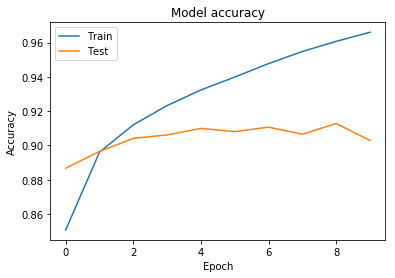

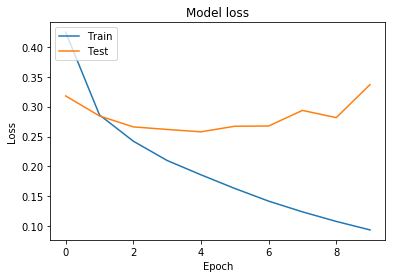

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
